# Final Project: Building and Solving MARL

## Setup 1

### Environment set up

In [ ]:
import numpy as np
import gym
from gym import spaces
import copy
from copy import copy
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

class MAGridWorld_1(gym.Env):
    metadata = { 'render.modes' : ['human', 'rgb_array'] }

    def __init__(self, x, y, n_agents):
        self.x = x
        self.y = y
        self._grid_size = (self.x, self.y)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = self._max_timestep = config['MAX_STEPS_PER_EPI']
        self.n_agents = n_agents
        self.n_landmarks = 10
        self.dist = int((self.x-1)/(n_agents-1))
        self._step_cost = -0.1
        self.num_of_states = self.x * self.y
        self.observation_space = spaces.Discrete(self.num_of_states)
        self.action_space = spaces.Discrete(5)



    def reset(self):
        self.agent_pos = []
        self.goal_pos = []
        self.landmark_pos = []
        for i in range(self.n_landmarks):
          self.landmark_pos.append([random.randint(5,20), random.randint(5,20)])
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)]
        for i in range(self.n_agents):
            self.agent_pos.append([self.x-1, i*self.dist])
            self.goal_pos.append([0, i*self.dist])
        self.goal_pos.reverse()


        observation = self.agent_pos
        return observation

    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist

    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])

    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.agent_pos[i]:
                return True
            elif new_pos == self.goal_pos[i]:
                return True

    def step(self, actions):
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]

        for i in range(self.n_agents):
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos[i])
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos[i])

            if new_dist < old_dist:
                rewards[i] = -0.1
            elif new_dist > old_dist:
                rewards[i] = -0.5

            elif (new_dist == old_dist) and not self.done[i]:
                rewards[i] = -1

            if (self.agent_pos[i] == self.goal_pos[i]):
                self.done[i] = True
                rewards[i] = 10
            else:
                self.done[i] = False


        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]


        observation = self.agent_pos
        info = {}
        return observation, rewards, self.done, info #all(done)


    def update_agent_pos(self, agent, action):
        next_pos = copy(self.agent_pos[agent])
        if action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')

        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass


    def render(self):
        state = np.copy(self.world)
        for i in range(self.n_landmarks):
          state[tuple(self.landmark_pos[i])] = 0.5
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 1 - (0.1 * i)
            state[tuple(self.goal_pos[i])] = 1 - (0.1 * i)
        return plt.imshow(state)

In [ ]:
config = {
    # number of agents
    'N_AGENTS' : 4,

    # grid world size 3x3, 4x4,...6x6
    #'GRID_SIZE' : 12,

    # x & y size
    'X_SIZE' : 25,
    'Y_SIZE' : 25,

    # max timesteps
    'MAX_STEPS_PER_EPI': 10
}

### Run for 10 random agents for timesteps

In [ ]:
from IPython.display import clear_output

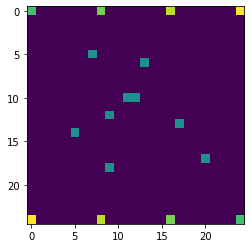

In [ ]:
if __name__ == '__main__':

  n_agents = config['N_AGENTS']
  x = config['X_SIZE']
  y = config['Y_SIZE']

  max_steps_episode = config['MAX_STEPS_PER_EPI']


  env = MAGridWorld_1(x=x, y=y, n_agents=n_agents)
  env.reset()
  i = 1

  results = []
  # while not all(env.done):
  #     action_n = [env.action_space.sample(), env.action_space.sample(), \
  #                   env.action_space.sample(), env.action_space.sample(), \
  #                   env.action_space.sample(), env.action_space.sample()]

  #     state, reward, done, _ = env.step(action_n)
  #     results.append(f'Timestep {i}: \n Actions: {action_n} \n'
  #                     f'State: {state} \n Reward: {reward} \n'
  #                     f'Done: {done} \n \n ')
  #     print(f'Timestep {i}')
  #     i += 1
  #     print('Actions: ', action_n)
  #     print('State: ', state)
  #     print('Reward: ', reward)
  #     print('Done: ', done)
  #     print('\n')
  #     plt.figure()
  #     env.render()
  #     plt.show()
  #     time.sleep(.4)
  #     clear_output(wait=True)


  # for result in results:
  #     print(result)

  env.render()

### Q-Learning

In [ ]:
config = {
    # number of agents
    'N_AGENTS' : 4,

    # grid world size 3x3, 4x4,...6x6
    'GRID_SIZE' : 5,

    # number of episodes that will run
    'NUM_EPI': 100,

    # max timesteps
    'MAX_STEPS_PER_EPI': 200,

    # initialize exploration rate to 1
    'EXPL_RATE': 1,

    # epsilon decay rate
    'EXPL_DECAY_RATE': 0.01,

    # minimum epsilon rate
    'MIN_EXPL_RATE': 0.01,

    # learning rate
    'ALPHA': 0.5,

    # discount factor
    'GAMMA': 0.9
}

In [ ]:
import numpy as np
import gym
from gym import spaces
import copy
from copy import copy
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

class MAGridWorld(gym.Env):
    metadata = { 'render.modes' : ['human', 'rgb_array'] }

    def __init__(self, size, n_agents):
        self.size = size
        self._grid_size = (self.size, self.size)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = config['MAX_STEPS_PER_EPI']
        self.n_agents = n_agents
        self.dist = int((self.size-1)/(n_agents-1))
        self._step_cost = -0.1
        self.num_of_states = self.size * self.size
        self.observation_space = spaces.Discrete(self.num_of_states)
        self.action_space = spaces.Discrete(5)



    def reset(self):
        self.agent_pos = []
        self.goal_pos = []
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)]
        for i in range(self.n_agents):
            self.agent_pos.append([self.size-1, i*self.dist])
            self.goal_pos.append([0, i*self.dist])
        self.goal_pos.reverse()


        observation = self._pos_to_state(self.agent_pos)
        return observation

    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist

    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])

    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.agent_pos[i]:
                return True
            elif new_pos == self.goal_pos[i]:
                return True

    def _pos_to_state(self, positions):
      pos_list = []
      state_list = []
      state_dict = {}
      for x in range(self.size):
        for y in range(self.size):
          pos_list.append(f'[{x}, {y}]')

      for i, val in enumerate(pos_list):
        state_dict[i] = val

      pos_to_state_dict = {v: k for k, v in state_dict.items()}
      state_list = [pos_to_state_dict[str(x)] for x in positions]
      return state_list

    def step(self, actions):
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]

        for i in range(self.n_agents):
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos[i])
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos[i])

            if new_dist < old_dist:
                rewards[i] = 1
            elif new_dist > old_dist:
                rewards[i] = -1

            elif (new_dist == old_dist) and not self.done[i]:
                rewards[i] = -10

            if (self.agent_pos[i] == self.goal_pos[i]):
                self.done[i] = True
                rewards[i] = 10
            else:
                self.done[i] = False


        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]


        observation = self._pos_to_state(self.agent_pos)
        info = {}
        return observation, rewards, self.done, info #all(done)


    def update_agent_pos(self, agent, action):
        next_pos = copy(self.agent_pos[agent])
        if action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')

        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass


    def render(self):
        state = np.copy(self.world)
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 1 - (0.1 * i)
            state[tuple(self.goal_pos[i])] = 1 - (0.1 * i)
        return plt.imshow(state)

In [ ]:
from IPython.display import clear_output

In [ ]:
if __name__ == '__main__':

  # Initialize Constants
  n_agents = config['N_AGENTS']
  size = config['GRID_SIZE']
  n_episodes = config['NUM_EPI']
  max_steps_episode = config['MAX_STEPS_PER_EPI']
  exploration_rate = config['EXPL_RATE']
  exploration_decay_rate = config['EXPL_DECAY_RATE']
  min_exploration_rate = config['MIN_EXPL_RATE']
  gamma = config['GAMMA']
  lr = config['ALPHA']

  # Make new Grid World
  env = MAGridWorld(size=size, n_agents=n_agents)
  n_observations = env.observation_space.n
  n_actions = env.action_space.n

  # Initialize Q-table to 0
  Q_table = np.zeros((n_agents, n_observations, n_actions))
  print(Q_table)

  # total Episode Reward
  total_episode_reward = []
  timesteps_per_episode = []
  exploration_decay = []
  # Iterate over episodes
  for episode in range(n_episodes):


    current_state = env.reset()
    i = 1

    episode_reward = np.zeros((n_agents))

    # while max timesteps or termination condition not met
    while not all(env.done):
      action_n = []

      # if exploration rate is greater than random numb from 0-1
      if np.random.uniform(0,1) < exploration_rate:

        # Take Random Action
        action_n = [env.action_space.sample(), env.action_space.sample(), \
                      env.action_space.sample(), env.action_space.sample(), \
                      env.action_space.sample(), env.action_space.sample()]
      # if exploration rate below random num from 0-1
      else:
        #exploit best actions using q_table
        for n in range(n_agents):
          action_n.append(np.argmax(Q_table[n, current_state[n], :]))

      # Environment runs the chosen action and returns the next state,
      # rewards, and true if episode ended
      next_state, rewards, done, _ = env.step(action_n)
      episode_reward[0:] += rewards[0:]

      # Update Q-table
      for n in range(n_agents):
        Q_table[n, current_state[n], action_n[n]] = (1-lr) * Q_table[n, current_state[n], action_n[n]] + lr * (rewards[n] + gamma * max(Q_table[n, next_state[n], :]))

      current_state = next_state
      # print(f'Episode {episode + 1}:')
      # print(f'Timestep {i}')
      # i += 1
      # print('Actions: ', action_n)
      # print('Next State: ', next_state)
      # print('Reward: ', rewards)
      # print('Episode Reward: ', episode_reward)
      # print('Done: ', done)
      # print('\n')
      # plt.figure()
      # env.render()
      # plt.show()
      # time.sleep(.01)
      # clear_output(wait=True)

    timesteps_per_episode.append(env._timestep)
    # Update exploration rate using decay formula
    exploration_decay.append(exploration_rate)
    exploration_rate = max(min_exploration_rate, np.exp(-exploration_decay_rate*episode))
    total_episode_reward.append(episode_reward)

KeyError: ignored

In [ ]:
print(total_episode_reward)


[array([-724., -907., -891., -640.]), array([-896., -931., -669., -927.]), array([-836., -969., -675., -507.]), array([ -789.,  -927.,  -882., -1038.]), array([-851., -742., -322., -255.]), array([ -887., -1089.,  -791.,  -720.]), array([-1020.,  -613.,  -222.,  -593.]), array([-584., -613., -378., -738.]), array([-718., -900., -704., -887.]), array([-956., -135., -560., -947.]), array([-473., -738., -798., -209.]), array([-778., -867., -893., -838.]), array([-602., -622., -311.,  583.]), array([-286., -540., -482., -200.]), array([-279., -161.,  428., -146.]), array([ 140., -277., -696., -338.]), array([-535.,   12., -738., -460.]), array([-257., -400.,  439., -120.]), array([-502., -257.,  131., -396.]), array([-522., -302., -684., -324.]), array([-197.,  250.,  179.,  159.]), array([  48.,  405.,   51., -445.]), array([-55., -17., 139., -66.]), array([-287.,   33.,  247.,  169.]), array([-54., -27.,  53.,  26.]), array([ 106.,  564., -101., -246.]), array([121.,   1., 243., 125.]), 

In [ ]:
print(Q_table)

[[[  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.        ]
  [ 89.00001049 100.          89.         100.         100.        ]
  [ 80.89999567  79.99999908  79.99999943 100.          79.99999985]
  [ 46.7213327   26.35390402  57.87941381  30.05064849  47.02921217]
  [ 64.4933715   55.82952496  53.47024668  62.52826846  39.44874617]
  [ 71.8153839   68.21415599  90.99998166  70.55846772  69.28897558]
  [ 80.88254927 100.          80.89999978  80.53948988  79.99999999]
  [ 73.53301996  91.          71.85687527  90.96269278  71.89998879]
  [ 45.8738501   52.8129947   65.64223795  40.59382109  39.90362722]
  [ 49.42276821  60.01318781  75.26254775  50.18680606  49.48786383]
  [ 64.35741785  82.86692002  74.50012306  58.24748548  61.45638396]
  [ 73.36350807  90.9998186   73.5482449   71.32650757  70.98731518]
  [ 66.05630471  82.89989275  64.5

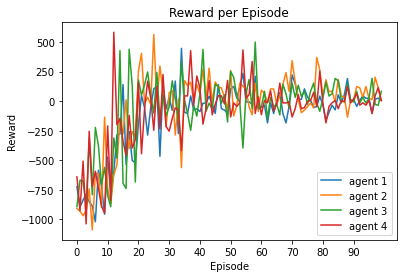

In [ ]:
labels = []
for agent in range(n_agents): labels.append(f'agent {agent+1}')
plt.plot(total_episode_reward)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title('Reward per Episode')
#plt.xticks(np.arange(len(total_episode_reward)), np.arange(1, len(total_episode_reward)+1))
plt.xticks(np.arange(0, len(total_episode_reward), step=10))
plt.legend(labels)

Text(0.5, 1.0, 'Epsilon Decay')

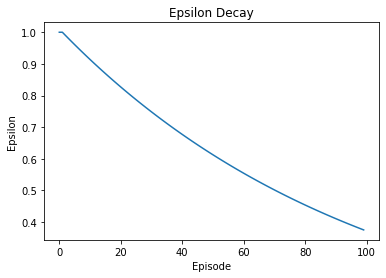

In [ ]:
plt.plot(exploration_decay)
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.title('Epsilon Decay')

Text(0.5, 1.0, 'Timsteps per Episode')

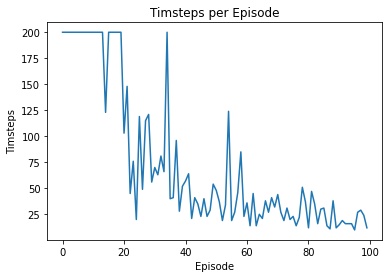

In [ ]:
plt.plot(timesteps_per_episode)
plt.ylabel('Timsteps')
plt.xlabel('Episode')
plt.title('Timsteps per Episode')

In [ ]:
if __name__=='__main__':
  # Initialize Constants
  n_agents = config['N_AGENTS']
  size = config['GRID_SIZE']
  n_episodes = 10
  max_steps_episode = config['MAX_STEPS_PER_EPI']
  #exploration_rate = config['EXPL_RATE']
  #exploration_decay_rate = config['EXPL_DECAY_RATE']
  #min_exploration_rate = config['MIN_EXPL_RATE']
  #gamma = config['GAMMA']
  #lr = config['ALPHA']

  # Make new Grid World
  env = MAGridWorld(size=size, n_agents=n_agents)
  n_observations = env.observation_space.n
  n_actions = env.action_space.n

  # Initialize Q-table to Optimal Policy Q-table
  optimal_q = Q_table

  # total Episode Reward
  total_episode_reward = []
  timesteps_per_episode = []
  exploration_decay = []
  # Iterate over episodes
  for episode in range(n_episodes):


    current_state = env.reset()
    i = 1

    episode_reward = np.zeros((n_agents))

    # while max timesteps or termination condition not met
    while not all(env.done):
      action_n = []


      #exploit best actions using optimal q table
      for n in range(n_agents):
        action_n.append(np.argmax(optimal_q[n, current_state[n], :]))

      # Environment runs the chosen action and returns the next state,
      # rewards, and true if episode ended
      next_state, rewards, done, _ = env.step(action_n)
      episode_reward[0:] += rewards[0:]


      current_state = next_state
      print(f'Episode {episode + 1}:')
      print(f'Timestep {i}')
      i += 1
      print('Actions: ', action_n)
      print('Next State: ', next_state)
      print('Reward: ', rewards)
      print('Episode Reward: ', episode_reward)
      print('Done: ', done)
      print('\n')
      plt.figure()
      env.render()
      plt.show()
      time.sleep(.1)
      clear_output(wait=True)

    timesteps_per_episode.append(env._timestep)

    total_episode_reward.append(episode_reward)


NameError: ignored

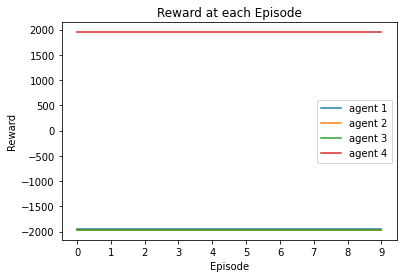

In [ ]:
labels = []
for agent in range(n_agents): labels.append(f'agent {agent+1}')
plt.plot(total_episode_reward)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title('Reward at each Episode')
#plt.xticks(np.arange(len(total_episode_reward)), np.arange(1, len(total_episode_reward)+1))
plt.xticks(np.arange(0, len(total_episode_reward)))
plt.legend(labels)

Text(0.5, 1.0, 'Timsteps per Episode')

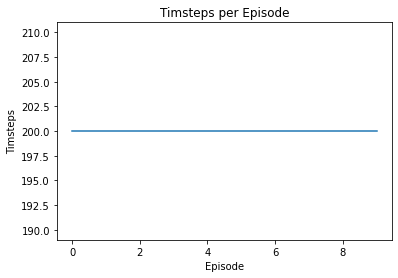

In [ ]:
plt.plot(timesteps_per_episode)
plt.ylabel('Timsteps')
plt.xlabel('Episode')
plt.title('Timsteps per Episode')

In [ ]:
config = {
    # number of agents
    'N_AGENTS' : 4,

    # grid world size 3x3, 4x4,...6x6
    'GRID_SIZE' : 5,

    # number of episodes that will run
    'NUM_EPI': 500,

    # max timesteps
    'MAX_STEPS_PER_EPI': 200,

    # initialize exploration rate to 1
    'EXPL_RATE': 1,

    # epsilon decay rate
    'EXPL_DECAY_RATE': 0.01,

    # minimum epsilon rate
    'MIN_EXPL_RATE': 0.01,

    # learning rate
    'ALPHA': 0.7,

    # discount factor
    'GAMMA': 0.9
}

In [ ]:
import numpy as np
import gym
from gym import spaces
import copy
from copy import copy
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

class MAGridWorld(gym.Env):
    metadata = { 'render.modes' : ['human', 'rgb_array'] }

    def __init__(self, size, n_agents):
        self.size = size
        self._grid_size = (self.size, self.size)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = config['MAX_STEPS_PER_EPI']
        self.n_agents = n_agents
        self.dist = int((self.size-1)/(n_agents-1))
        self._step_cost = -0.1
        self.num_of_states = self.size * self.size
        self.observation_space = spaces.Discrete(self.num_of_states)
        self.action_space = spaces.Discrete(5)



    def reset(self):
        self.agent_pos = []
        self.goal_pos = []
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)]
        for i in range(self.n_agents):
            self.agent_pos.append([self.size-1, i*self.dist])
            self.goal_pos.append([0, i*self.dist])
        self.goal_pos.reverse()


        observation = self._pos_to_state(self.agent_pos)
        return observation

    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist

    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])

    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.agent_pos[i]:
                return True
            elif new_pos == self.goal_pos[i]:
                return True

    def _pos_to_state(self, positions):
      pos_list = []
      state_list = []
      state_dict = {}
      for x in range(self.size):
        for y in range(self.size):
          pos_list.append(f'[{x}, {y}]')

      for i, val in enumerate(pos_list):
        state_dict[i] = val

      pos_to_state_dict = {v: k for k, v in state_dict.items()}
      state_list = [pos_to_state_dict[str(x)] for x in positions]
      return state_list

    def step(self, actions):
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]

        for i in range(self.n_agents):
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos[i])
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos[i])

            if new_dist < old_dist:
                rewards[i] = 1
            elif new_dist > old_dist:
                rewards[i] = -1

            elif (new_dist == old_dist) and not self.done[i]:
                rewards[i] = -10

            if (self.agent_pos[i] == self.goal_pos[i]):
                self.done[i] = True
                rewards[i] = 10
            else:
                self.done[i] = False


        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]


        observation = self._pos_to_state(self.agent_pos)
        info = {}
        return observation, rewards, self.done, info #all(done)


    def update_agent_pos(self, agent, action):
        next_pos = copy(self.agent_pos[agent])
        if action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')

        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass


    def render(self):
        state = np.copy(self.world)
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 1 - (0.1 * i)
            state[tuple(self.goal_pos[i])] = 1 - (0.1 * i)
        return plt.imshow(state)

In [ ]:
from IPython.display import clear_output

In [ ]:
if __name__ == '__main__':

  # Initialize Constants
  n_agents = config['N_AGENTS']
  size = config['GRID_SIZE']
  n_episodes = config['NUM_EPI']
  max_steps_episode = config['MAX_STEPS_PER_EPI']
  exploration_rate = config['EXPL_RATE']
  exploration_decay_rate = config['EXPL_DECAY_RATE']
  min_exploration_rate = config['MIN_EXPL_RATE']
  gamma = config['GAMMA']
  lr = config['ALPHA']

  # Make new Grid World
  env = MAGridWorld(size=size, n_agents=n_agents)
  n_observations = env.observation_space.n
  n_actions = env.action_space.n

  # Initialize Q-table to 0
  Q_table = np.zeros((n_agents, n_observations, n_actions))
  #print(Q_table)

  # total Episode Reward
  total_episode_reward = []
  timesteps_per_episode = []
  exploration_decay = []
  # Iterate over episodes
  for episode in range(n_episodes):


    current_state = env.reset()
    i = 1

    episode_reward = np.zeros((n_agents))

    # while max timesteps or termination condition not met
    while not all(env.done):
      action_n = []

      # if exploration rate is greater than random numb from 0-1
      if np.random.uniform(0,1) < exploration_rate:

        # Take Random Action
        action_n = [env.action_space.sample(), env.action_space.sample(), \
                      env.action_space.sample(), env.action_space.sample(), \
                      env.action_space.sample(), env.action_space.sample()]
      # if exploration rate below random num from 0-1
      else:
        #exploit best actions using q_table
        for n in range(n_agents):
          action_n.append(np.argmax(Q_table[n, current_state[n], :]))

      # Environment runs the chosen action and returns the next state,
      # rewards, and true if episode ended
      next_state, rewards, done, _ = env.step(action_n)
      episode_reward[0:] += rewards[0:]

      # Update Q-table
      for n in range(n_agents):
        Q_table[n, current_state[n], action_n[n]] = (1-lr) * Q_table[n, current_state[n], action_n[n]] + lr * (rewards[n] + gamma * max(Q_table[n, next_state[n], :]))

      current_state = next_state
      # print(f'Episode {episode + 1}:')
      # print(f'Timestep {i}')
      # i += 1
      # print('Actions: ', action_n)
      # print('Next State: ', next_state)
      # print('Reward: ', rewards)
      # print('Episode Reward: ', episode_reward)
      # print('Done: ', done)
      # print('\n')
      # plt.figure()
      # env.render()
      # plt.show()
      # time.sleep(.01)
      # clear_output(wait=True)

    timesteps_per_episode.append(env._timestep)
    # Update exploration rate using decay formula
    exploration_decay.append(exploration_rate)
    exploration_rate = max(min_exploration_rate, np.exp(-exploration_decay_rate*episode))
    total_episode_reward.append(episode_reward)

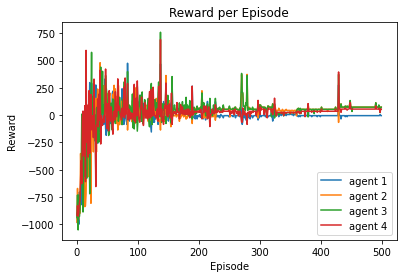

In [ ]:
labels = []
for agent in range(n_agents): labels.append(f'agent {agent+1}')
plt.plot(total_episode_reward)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title('Reward per Episode')
#plt.xticks(np.arange(len(total_episode_reward)), np.arange(1, len(total_episode_reward)+1))
#plt.xticks(np.arange(0, len(total_episode_reward), step=10))
plt.legend(labels)

Text(0.5, 1.0, 'Epsilon Decay')

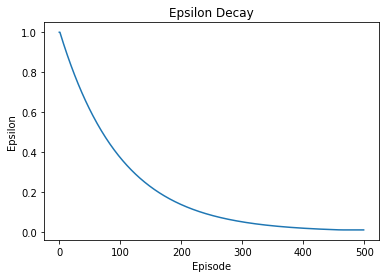

In [ ]:
plt.plot(exploration_decay)
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.title('Epsilon Decay')

Text(0.5, 1.0, 'Timsteps per Episode')

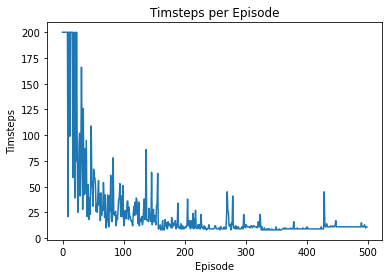

In [ ]:
plt.plot(timesteps_per_episode)
plt.ylabel('Timsteps')
plt.xlabel('Episode')
plt.title('Timsteps per Episode')

In [ ]:
import tensorflow as tf


### Deep Q-Learning

In [ ]:
class DqnAgent:


  def __init__(self):
    self.q_net = self._build_dqn_model()
    self.target_q_net = self._build_dqn_model()

  def policy(self, state):
    state_input = tf.convert_to_tensor(state[None, :], dtype=tf.float32)
    action_q = self.q_net(state_input)
    action = np.argmax(action_q.numpy()[0], axis=0)
    return action

  def train(self, batch):
    state_batch, next_state_batch, action_batch, reward_batch, done_batch = batch
    current_q = self.q_net(state_batch)
    target_q = np.copy(current_q)
    next_q = self.target_q_net(next_state_batch)
    max_next_q = np.amax(next_q, axis=1)
    for i in range(state_batch.shape[0]):
        target_q[i][action_batch[i]] = reward_batch[i] if done_batch[i] else reward_batch[i] + 0.95 * max_next_q[i]
    result = self.q_net.fit(x=state_batch, y=target_q)
    return result.history['loss']

In [ ]:
class ReplayBuffer:
  def __init__(self):
    self.gameplay_experiences = deque(maxlen=1000000)

  def store_gameplay_experience(self, state, next_state, reward, action, done):
    self.gameplay_experiences.append((state, next_state, reward, action, done))

  def sample_gameplay_batch(self):
    batch_size = min(128, len(self.gameplay_experiences))
    sampled_gameplay_batch = random.sample(self.gameplay_experiences, batch_size)
    state_batch, next_state_batch, action_batch, reward_batch, done_batch = [], [], [], [], []
    for gameplay_experience in sampled_gameplay_batch:
      state_batch.append(gameplay_experience[0])
      next_state_batch.append(gameplay_experience[1])
      reward_batch.append(gameplay_experience[2])
      action_batch.append(gameplay_experience[3])
      done_batch.append(gameplay_experience[4])
    return np.array(state_batch), np.array(next_state_batch), action_batch, reward_batch, done_batch

In [ ]:
def collect_gameplay_experience(env, agent, buffer):

  state = env.reset()
  done = False
  while not done:
    action = agent.policy(state)
    next_state, reward, done = env.step(action)
    buffer.store_gameplay_experience(state, next_state, reward, action, done)
    state = next_state

def train_model():

  env = MAGridWorld_1()
  agent = DqnAgent()
  buffer = ReplayBuffer()
  for episode_cnt in range(6000): # Train the agent for 6000 episodes of the game
    collect_gameplay_experience(env, agent, buffer)
    gameplay_experience_batch = buffer.sample_gameplay_batch()
    loss = agent.train(gameplay_experience_batch)
    if episode_cnt % 20 == 0:
      agent.update_target_network()

In [ ]:
@staticmethod
def _build_dqn_model():

    q_network = Sequential()
    q_network.add(Dense(64, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
    q_network.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    q_network.add(Dense(2, activation='linear', kernel_initializer='he_uniform'))
    q_network.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mse')
    return q_network

## Setup 2

### Environment Set Up

In [ ]:
import numpy as np
import gym
from gym import spaces
import copy
from copy import copy
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

class MAGridWorld2(gym.Env):
    metadata = { 'render.modes' : ['human', 'rgb_array'] }

    def __init__(self, size, n_agents):
        self.size = size
        self._grid_size = (self.size, self.size)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = 200
        self.n_agents = n_agents
        self.dist = int((self.size-1)/(n_agents-1))
        self._step_cost = -0.1
        self.observation_space = spaces.Discrete(self.size * self.size)
        self.action_space = spaces.Discrete(5)

    def reset(self):
        self.agent_pos = []
        self.goal_pos = [np.random.randint(self.size-1), 0]
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)]
        #self.q_tables = []
        for i in range(self.n_agents):
            self.agent_pos.append([self.size-1, i*self.dist])
            # self.goal_pos.append([0, i*self.dist])
            #self.q_tables.append(np.zeros((self.size*self.size, 4)))

        self.goal_pos.reverse()
        observation = self._pos_to_state(self.agent_pos)
        return observation

    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist

    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])

    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.goal_pos:
                return False
            elif new_pos == self.agent_pos[i]:
                return True

    def _pos_to_state(self, positions):
      pos_list = []
      state_list = []
      state_dict = {}
      for x in range(self.size):
        for y in range(self.size):
          pos_list.append(f'[{x}, {y}]')

      for i, val in enumerate(pos_list):
        state_dict[i] = val

      pos_to_state_dict = {v: k for k, v in state_dict.items()}
      state_list = [pos_to_state_dict[str(x)] for x in positions]
      return state_list

    def step(self, actions):
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]

        old_distances = []
        new_distances = []
        baseline_new = 0
        baseline_old = 0
        for i in range(self.n_agents):
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos)
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos)
            #add up old distances to get baseline reward of system
            #can ignore this stuff for now
            old_distances.append(old_dist)
            new_distances.append(new_dist)
            baseline_old += old_dist
            baseline_new += new_dist

        #reward system changes




        if baseline_old > baseline_new:
          for i in range(len(old_distances)):
            if new_distances[i] < old_distances[i]:
                rewards[i] = 1.5
            elif new_distances[i] > old_distances[i]:
                rewards[i] = -1

            elif (new_distances[i] == old_distances[i]) and not self.done[i]:
                rewards[i] = -0.1

            if (self.agent_pos[i] == self.goal_pos):
                self.done[i] = True
                rewards[i] = 10
            else:
                self.done[i] = False

        elif baseline_new > baseline_old:
          for i in range(len(old_distances)):
            if new_distances[i] < old_distances[i]:
                rewards[i] = 1
            elif new_distances[i] > old_distances[i]:
                rewards[i] = -1.5

            elif (new_distances[i] == old_distances[i]) and not self.done[i]:
                rewards[i] = 0.1

            if (self.agent_pos[i] == self.goal_pos):
                self.done[i] = True
                rewards[i] = 10
            else:
                self.done[i] = False

        else:
          for i in range(len(old_distances)):
            if new_distances[i] < old_distances[i]:
                rewards[i] = -1.5
            elif new_distances[i] > old_distances[i]:
                rewards[i] = -2.5

            elif (new_distances[i] == old_distances[i]) and not self.done[i]:
                rewards[i] = -10

            if (self.agent_pos[i] == self.goal_pos):
                self.done[i] = True
                rewards[i] = 10
            else:
                self.done[i] = False



        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]

        observation = self._pos_to_state(self.agent_pos)
        info = {}
        return observation, rewards, self.done, info #all(done)


    def update_agent_pos(self, agent, action):
        next_pos = copy(self.agent_pos[agent])
        if action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')

        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass


    def render(self):
        state = np.copy(self.world)
        state[tuple(self.goal_pos)] = 0.5
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 1 - (0.1 * i)
            # state[tuple(self.goal_pos[i])] = 1 - (0.1 * i)
        return plt.imshow(state)

In [ ]:
config = {
    'N_AGENTS' : 2,
    'GRID_SIZE' : 3,
    'NUM_EPISODES': 500
}


In [ ]:
if __name__ == '__main__':
    n_agents = config['N_AGENTS']
    size = config['GRID_SIZE']
    episodes = config['NUM_EPISODES']
    max_steps = 400
    explore_rate = 1
    decay_rate = 0.01
    min_explore_rate = 0.01
    alpha = 0.5
    gamma = 0.9
    env = MAGridWorld2(size=size, n_agents=n_agents)
    n_observations = env.observation_space.n
    n_actions = env.action_space.n

    # Initialize Q-table to 0
    Q_table = np.zeros((n_agents, n_observations, n_actions))
    print(Q_table)

    rewards_per_episode = []
    timesteps_per_episode = []
    exploration_decay = []
    # Iterate over episodes
    for episode in range(episodes):


      current_state = env.reset()
      i = 1

      episode_reward = np.zeros((n_agents))

      # while max timesteps or termination condition not met
      while not all(env.done):
        action_n = []

        # if exploration rate is greater than random numb from 0-1
        if np.random.uniform(0,1) < explore_rate:

          # Take Random Action
          action_n = [env.action_space.sample(), env.action_space.sample(), \
                        env.action_space.sample(), env.action_space.sample(), \
                        env.action_space.sample(), env.action_space.sample()]
        # if exploration rate below random num from 0-1
        else:
          #exploit best actions using q_table
          for n in range(n_agents):
            action_n.append(np.argmax(Q_table[n, current_state[n], :]))

        # Environment runs the chosen action and returns the next state,
        # rewards, and true if episode ended
        next_state, rewards, done, _ = env.step(action_n)
        episode_reward[0:] += rewards[0:]

        # Update Q-table
        for n in range(n_agents):
          Q_table[n, current_state[n], action_n[n]] = (1-alpha) * Q_table[n, current_state[n], action_n[n]] + alpha * (rewards[n] + gamma * max(Q_table[n, next_state[n], :]))

        current_state = next_state
        # print(f'Episode {episode + 1}:')
        # print(f'Timestep {i}')
        # i += 1
        # print('Actions: ', action_n)
        # print('Next State: ', next_state)
        # print('Reward: ', rewards)
        # print('Episode Reward: ', episode_reward)
        # print('Done: ', done)
        # print('\n')
        # plt.figure()
        # env.render()
        # plt.show()
        # time.sleep(.01)
        # clear_output(wait=True)

      timesteps_per_episode.append(env._timestep)
      # Update exploration rate using decay formula
      exploration_decay.append(explore_rate)
      explore_rate = max(min_explore_rate, np.exp(-decay_rate*episode))
      rewards_per_episode.append(episode_reward)

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [ ]:
print(Q_table)

[[[53.23626856 48.97410023 65.11532728 49.82021649 55.61817226]
  [53.34561285 48.89432678 51.23033704 61.44305684 50.30593537]
  [57.57553763 54.16788185 57.33682994 69.95207321 52.92882431]
  [48.90918402 60.00827341 54.45013871 53.99961714 52.59447797]
  [52.76144306 62.09133042 55.72997062 53.00736142 53.12123176]
  [51.44784574 59.27653365 56.58609239 60.02847563 52.36462252]
  [44.40841412 56.2561402  49.75224241 51.41418567 42.30484804]
  [52.87734231 55.43957156 53.28530977 53.35864667 53.09939738]
  [44.0165178  56.57528318 45.98951858 57.3107088  46.0367531 ]]

 [[50.50593364 49.81624029 68.3527935  47.03768502 49.32962473]
  [45.0336181  54.0920305  50.49979854 63.3228096  53.77318485]
  [49.10457077 50.18181076 50.34069279 67.65992064 37.04745152]
  [44.07427671 53.09489954 42.62163118 39.19379337 41.71138208]
  [41.90645461 42.67287696 41.80288752 41.11713803 37.60225903]
  [45.42688765 63.41262345 50.19515452 42.43974388 41.99626569]
  [41.451524   45.61229645 44.23908977

[array([-42.8, -90.5]), array([-101.5, -248.6]), array([-54.1, -93.7]), array([ 135.3, -167.4]), array([ -61.7, -463.9]), array([-116.4,    1.3]), array([-44.2, -20.4]), array([ -37.8, -244.8]), array([-291.5, -275.4]), array([-138.2,   -5.2]), array([-302.9,   89.2]), array([ 55.8, -75.6]), array([47.6, -9.4]), array([-35.6,  64.8]), array([ 17.4, -12.1]), array([67.5, 14.5]), array([-45.7,  -3.3]), array([  0.2, -26.9]), array([25.9, -5.5]), array([ 83.6, -22.7]), array([30. , 14.6]), array([-150.5,   21.2]), array([-72.7,  46.1]), array([-9.6, 49. ]), array([36.8, -1.8]), array([-122.4,  222.5]), array([-67.5, -37.1]), array([12.9, 12.9]), array([  6.6, -31.2]), array([37.5, 22.1]), array([-34.7,  68.5]), array([ -71.1, -142.9]), array([-26.,  15.]), array([-6.4, 22.9]), array([-7.1, -7.1]), array([29. , 30.6]), array([ 93.6, -42.4]), array([ 68.9, -11.9]), array([ 51.4, -15.5]), array([-9.5, 51.3]), array([-41. , -48.5]), array([20.6, -8.5]), array([33.4, -4. ]), array([ 9.8, 60.7]

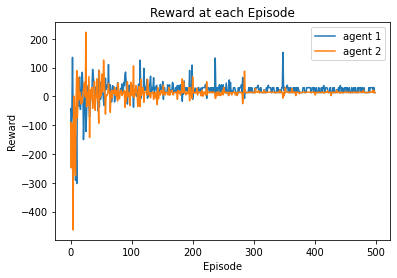

In [ ]:
print(rewards_per_episode)
labels = []
for agent in range(n_agents): labels.append(f'agent {agent+1}')
plt.plot(rewards_per_episode)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title('Reward at each Episode')
#plt.xticks(np.arange(len(total_episode_reward)), np.arange(1, len(total_episode_reward)+1))
#plt.xticks(np.arange(0, len(rewards_per_episode), step=10))
plt.legend(labels)

[1, 1.0, 0.9900498337491681, 0.9801986733067553, 0.9704455335485082, 0.9607894391523232, 0.951229424500714, 0.9417645335842487, 0.9323938199059483, 0.9231163463866358, 0.9139311852712282, 0.9048374180359595, 0.8958341352965282, 0.8869204367171575, 0.8780954309205613, 0.8693582353988059, 0.8607079764250578, 0.8521437889662113, 0.8436648165963837, 0.835270211411272, 0.8269591339433623, 0.8187307530779818, 0.8105842459701871, 0.8025187979624785, 0.794533602503334, 0.7866278610665535, 0.7788007830714049, 0.7710515858035663, 0.7633794943368531, 0.7557837414557255, 0.7482635675785653, 0.7408182206817179, 0.7334469562242892, 0.7261490370736909, 0.7189237334319262, 0.7117703227626097, 0.7046880897187134, 0.697676326071031, 0.6907343306373547, 0.6838614092123558, 0.6770568744981647, 0.6703200460356393, 0.6636502501363194, 0.6570468198150567, 0.6505090947233165, 0.6440364210831414, 0.6376281516217733, 0.631283645506926, 0.6250022682827008, 0.6187833918061408, 0.6126263941844161, 0.60653065971263

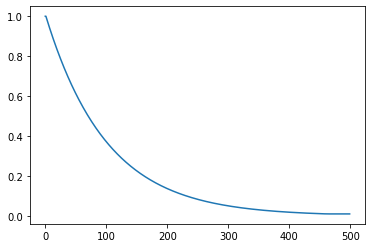

In [ ]:
print(exploration_decay)
plt.plot(exploration_decay)

[51, 144, 48, 138, 200, 37, 22, 89, 149, 115, 138, 20, 13, 21, 16, 10, 29, 18, 18, 25, 5, 105, 28, 13, 51, 73, 67, 4, 41, 7, 36, 62, 26, 22, 8, 13, 32, 18, 9, 14, 16, 10, 16, 15, 7, 21, 36, 19, 7, 17, 6, 14, 5, 8, 25, 20, 3, 32, 14, 6, 7, 7, 36, 3, 7, 16, 5, 9, 10, 13, 3, 6, 11, 7, 6, 6, 11, 15, 11, 13, 9, 3, 8, 5, 7, 12, 3, 9, 7, 29, 17, 17, 5, 13, 8, 4, 10, 17, 4, 13, 5, 6, 4, 32, 11, 16, 7, 8, 7, 10, 15, 6, 19, 3, 20, 10, 6, 5, 3, 6, 14, 4, 4, 7, 6, 10, 12, 6, 7, 12, 8, 11, 3, 7, 4, 5, 20, 3, 7, 6, 4, 8, 17, 7, 8, 4, 3, 5, 6, 5, 4, 8, 13, 5, 5, 6, 3, 3, 3, 6, 6, 6, 6, 6, 3, 7, 6, 8, 6, 3, 3, 3, 5, 3, 7, 11, 7, 7, 4, 10, 6, 4, 4, 9, 5, 9, 11, 3, 5, 6, 5, 5, 5, 3, 6, 15, 6, 3, 5, 18, 12, 3, 7, 3, 8, 7, 3, 7, 6, 5, 5, 3, 5, 3, 7, 5, 5, 8, 5, 5, 4, 5, 4, 8, 6, 5, 5, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 15, 9, 3, 5, 4, 5, 5, 6, 4, 3, 6, 3, 5, 6, 6, 3, 5, 3, 10, 5, 3, 3, 4, 10, 3, 8, 3, 6, 3, 3, 5, 5, 5, 6, 3, 3, 4, 3, 5, 3, 5, 5, 5, 7, 3, 16, 6, 4, 14, 5, 3, 3, 3, 3, 3, 5, 3, 5, 5, 3, 5, 3, 3, 

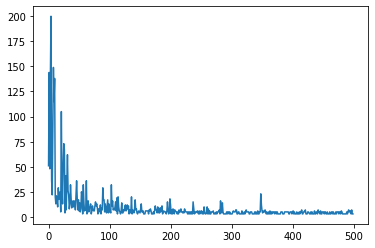

In [ ]:
print(timesteps_per_episode)
plt.plot(timesteps_per_episode)

Episode 10:
Timestep 5
Actions:  [2, 3]
Next State:  [0, 0]
Reward:  [10, 10]
Episode Reward:  [30.  14.6]
Done:  [True, True]




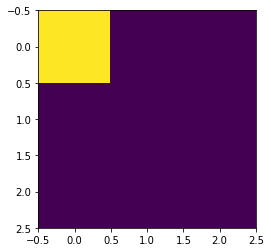

In [ ]:
from IPython.display import clear_output
if __name__=='__main__':
  # Initialize Constants
  n_agents = config['N_AGENTS']
  size = config['GRID_SIZE']
  n_episodes = 10
  max_steps_episode = 200
  #exploration_rate = config['EXPL_RATE']
  #exploration_decay_rate = config['EXPL_DECAY_RATE']
  #min_exploration_rate = config['MIN_EXPL_RATE']
  #gamma = config['GAMMA']
  #lr = config['ALPHA']

  # Make new Grid World
  env = MAGridWorld2(size=size, n_agents=n_agents)
  n_observations = env.observation_space.n
  n_actions = env.action_space.n

  # Initialize Q-table to Optimal Policy Q-table
  optimal_q = Q_table

  # total Episode Reward
  total_episode_reward = []
  timesteps_per_episode = []
  exploration_decay = []
  # Iterate over episodes
  for episode in range(n_episodes):


    current_state = env.reset()
    i = 1

    episode_reward = np.zeros((n_agents))

    # while max timesteps or termination condition not met
    while not all(env.done):
      action_n = []


      #exploit best actions using optimal q table
      for n in range(n_agents):
        action_n.append(np.argmax(optimal_q[n, current_state[n], :]))

      # Environment runs the chosen action and returns the next state,
      # rewards, and true if episode ended
      next_state, rewards, done, _ = env.step(action_n)
      episode_reward[0:] += rewards[0:]


      current_state = next_state
      print(f'Episode {episode + 1}:')
      print(f'Timestep {i}')
      i += 1
      print('Actions: ', action_n)
      print('Next State: ', next_state)
      print('Reward: ', rewards)
      print('Episode Reward: ', episode_reward)
      print('Done: ', done)
      print('\n')
      plt.figure()
      env.render()
      plt.show()
      time.sleep(.1)
      clear_output(wait=True)

    timesteps_per_episode.append(env._timestep)

    total_episode_reward.append(episode_reward)

[array([13., 13.]), array([30. , 14.6]), array([30. , 14.6]), array([13., 13.]), array([30. , 14.6]), array([30. , 14.6]), array([13., 13.]), array([13., 13.]), array([30. , 14.6]), array([30. , 14.6])]


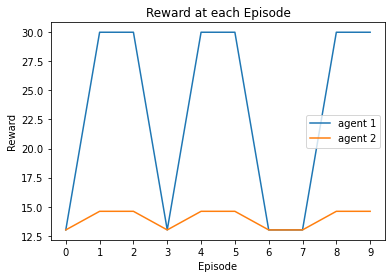

In [ ]:
print(total_episode_reward)
labels = []
for agent in range(n_agents): labels.append(f'agent {agent+1}')
plt.plot(total_episode_reward)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title('Reward at each Episode')
#plt.xticks(np.arange(len(total_episode_reward)), np.arange(1, len(total_episode_reward)+1))
plt.xticks(np.arange(0, len(total_episode_reward)))
plt.legend(labels)

In [ ]:
import numpy as np
import gym
from gym import spaces
import copy
from copy import copy
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

class MAGridWorld2(gym.Env):
    metadata = { 'render.modes' : ['human', 'rgb_array'] }

    def __init__(self, size, n_agents):
        self.size = size
        self._grid_size = (self.size, self.size)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = 200
        self.n_agents = n_agents
        self.dist = int((self.size-1)/(n_agents-1))
        self._step_cost = -0.1
        self.observation_space = spaces.Discrete(self.size * self.size)
        self.action_space = spaces.Discrete(5)

    def reset(self):
        self.agent_pos = []
        self.goal_pos = [np.random.randint(self.size-1), 0]
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)]
        #self.q_tables = []
        for i in range(self.n_agents):
            self.agent_pos.append([self.size-1, i*self.dist])
            # self.goal_pos.append([0, i*self.dist])
            #self.q_tables.append(np.zeros((self.size*self.size, 4)))

        self.goal_pos.reverse()
        observation = self._pos_to_state(self.agent_pos)
        return observation

    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist

    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])

    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.goal_pos:
                return False
            elif new_pos == self.agent_pos[i]:
                return True

    def _pos_to_state(self, positions):
      pos_list = []
      state_list = []
      state_dict = {}
      for x in range(self.size):
        for y in range(self.size):
          pos_list.append(f'[{x}, {y}]')

      for i, val in enumerate(pos_list):
        state_dict[i] = val

      pos_to_state_dict = {v: k for k, v in state_dict.items()}
      state_list = [pos_to_state_dict[str(x)] for x in positions]
      return state_list

    def step(self, actions):
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]

        old_distances = []
        new_distances = []
        baseline_new = 0
        baseline_old = 0
        for i in range(self.n_agents):
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos)
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos)
            #add up old distances to get baseline reward of system
            #can ignore this stuff for now
            old_distances.append(old_dist)
            new_distances.append(new_dist)
            baseline_old += old_dist
            baseline_new += new_dist

        #reward system changes




        if baseline_old > baseline_new:
          for i in range(len(old_distances)):
            if new_distances[i] < old_distances[i]:
                rewards[i] = 1.5
            elif new_distances[i] > old_distances[i]:
                rewards[i] = -1

            elif (new_distances[i] == old_distances[i]) and not self.done[i]:
                rewards[i] = -0.1

            if (self.agent_pos[i] == self.goal_pos):
                self.done[i] = True
                rewards[i] = 10
            else:
                self.done[i] = False

        elif baseline_new > baseline_old:
          for i in range(len(old_distances)):
            if new_distances[i] < old_distances[i]:
                rewards[i] = 1
            elif new_distances[i] > old_distances[i]:
                rewards[i] = -1.5

            elif (new_distances[i] == old_distances[i]) and not self.done[i]:
                rewards[i] = 0.1

            if (self.agent_pos[i] == self.goal_pos):
                self.done[i] = True
                rewards[i] = 10
            else:
                self.done[i] = False

        else:
          for i in range(len(old_distances)):
            if new_distances[i] < old_distances[i]:
                rewards[i] = -1.5
            elif new_distances[i] > old_distances[i]:
                rewards[i] = -2.5

            elif (new_distances[i] == old_distances[i]) and not self.done[i]:
                rewards[i] = -10

            if (self.agent_pos[i] == self.goal_pos):
                self.done[i] = True
                rewards[i] = 10
            else:
                self.done[i] = False



        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]

        observation = self._pos_to_state(self.agent_pos)
        info = {}
        return observation, rewards, self.done, info #all(done)


    def update_agent_pos(self, agent, action):
        next_pos = copy(self.agent_pos[agent])
        if action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')

        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass


    def render(self):
        state = np.copy(self.world)
        state[tuple(self.goal_pos)] = 0.5
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 1 - (0.1 * i)
            # state[tuple(self.goal_pos[i])] = 1 - (0.1 * i)
        return plt.imshow(state)

In [ ]:
config = {
    'N_AGENTS' : 2,
    'GRID_SIZE' : 4,
    'NUM_EPISODES': 600
}

In [ ]:
if __name__ == '__main__':
    n_agents = config['N_AGENTS']
    size = config['GRID_SIZE']
    episodes = config['NUM_EPISODES']
    max_steps = 400
    explore_rate = 1
    decay_rate = 0.01
    min_explore_rate = 0.01
    alpha = 0.7
    gamma = 0.9
    env = MAGridWorld2(size=size, n_agents=n_agents)
    n_observations = env.observation_space.n
    n_actions = env.action_space.n

    # Initialize Q-table to 0
    Q_table = np.zeros((n_agents, n_observations, n_actions))
    print(Q_table)

    rewards_per_episode = []
    timesteps_per_episode = []
    exploration_decay = []
    # Iterate over episodes
    for episode in range(episodes):


      current_state = env.reset()
      i = 1

      episode_reward = np.zeros((n_agents))

      # while max timesteps or termination condition not met
      while not all(env.done):
        action_n = []

        # if exploration rate is greater than random numb from 0-1
        if np.random.uniform(0,1) < explore_rate:

          # Take Random Action
          action_n = [env.action_space.sample(), env.action_space.sample(), \
                        env.action_space.sample(), env.action_space.sample(), \
                        env.action_space.sample(), env.action_space.sample()]
        # if exploration rate below random num from 0-1
        else:
          #exploit best actions using q_table
          for n in range(n_agents):
            action_n.append(np.argmax(Q_table[n, current_state[n], :]))

        # Environment runs the chosen action and returns the next state,
        # rewards, and true if episode ended
        next_state, rewards, done, _ = env.step(action_n)
        episode_reward[0:] += rewards[0:]

        # Update Q-table
        for n in range(n_agents):
          Q_table[n, current_state[n], action_n[n]] = (1-alpha) * Q_table[n, current_state[n], action_n[n]] + alpha * (rewards[n] + gamma * max(Q_table[n, next_state[n], :]))

        current_state = next_state
        # print(f'Episode {episode + 1}:')
        # print(f'Timestep {i}')
        # i += 1
        # print('Actions: ', action_n)
        # print('Next State: ', next_state)
        # print('Reward: ', rewards)
        # print('Episode Reward: ', episode_reward)
        # print('Done: ', done)
        # print('\n')
        # plt.figure()
        # env.render()
        # plt.show()
        # time.sleep(.01)
        # clear_output(wait=True)

      timesteps_per_episode.append(env._timestep)
      # Update exploration rate using decay formula
      exploration_decay.append(explore_rate)
      explore_rate = max(min_explore_rate, np.exp(-decay_rate*episode))
      rewards_per_episode.append(episode_reward)

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


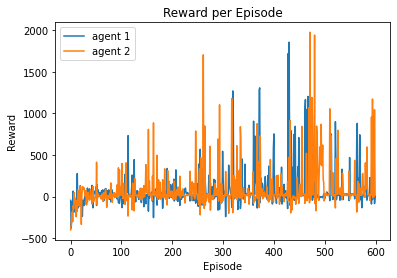

In [ ]:
labels = []
for agent in range(n_agents): labels.append(f'agent {agent+1}')
plt.plot(rewards_per_episode)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title('Reward per Episode')
#plt.xticks(np.arange(len(total_episode_reward)), np.arange(1, len(total_episode_reward)+1))
#plt.xticks(np.arange(0, len(total_episode_reward), step=10))
plt.legend(labels)

Text(0.5, 1.0, 'Epsilon Decay')

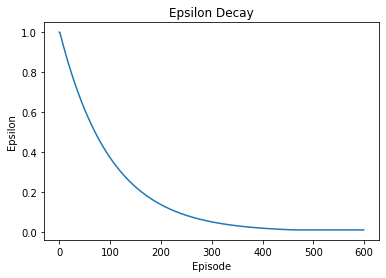

In [ ]:
plt.plot(exploration_decay)
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.title('Epsilon Decay')

[168, 200, 200, 132, 200, 124, 137, 88, 41, 68, 113, 200, 31, 72, 61, 57, 80, 44, 125, 176, 64, 186, 43, 145, 32, 55, 71, 26, 19, 14, 36, 77, 21, 67, 17, 14, 16, 41, 36, 69, 36, 38, 37, 17, 93, 29, 55, 14, 17, 13, 36, 103, 73, 17, 13, 9, 12, 20, 7, 12, 16, 11, 15, 25, 28, 23, 14, 26, 14, 39, 7, 69, 12, 18, 45, 25, 15, 15, 16, 32, 15, 23, 65, 15, 9, 11, 13, 21, 11, 10, 14, 25, 22, 17, 60, 64, 58, 10, 22, 7, 34, 86, 20, 19, 29, 45, 28, 66, 19, 85, 10, 17, 7, 139, 14, 8, 7, 8, 14, 7, 18, 74, 34, 7, 50, 90, 32, 10, 43, 23, 15, 11, 18, 8, 29, 6, 21, 24, 6, 36, 51, 10, 19, 12, 73, 74, 6, 49, 84, 19, 10, 22, 22, 100, 5, 28, 5, 5, 12, 21, 91, 43, 17, 161, 9, 6, 7, 68, 12, 10, 96, 70, 6, 31, 18, 19, 28, 37, 13, 5, 10, 76, 15, 40, 30, 44, 16, 16, 8, 8, 84, 57, 21, 13, 33, 12, 11, 35, 23, 18, 9, 51, 17, 31, 28, 15, 7, 55, 15, 30, 6, 18, 6, 5, 6, 55, 11, 7, 32, 11, 6, 16, 5, 6, 13, 48, 26, 10, 9, 9, 10, 9, 7, 7, 7, 54, 5, 16, 33, 37, 25, 43, 17, 61, 13, 9, 114, 84, 10, 6, 19, 100, 87, 81, 48, 123,

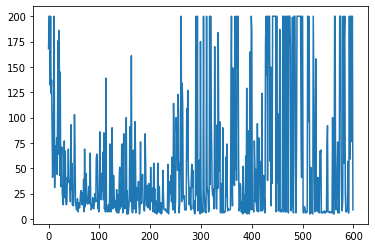

In [ ]:
print(timesteps_per_episode)
plt.plot(timesteps_per_episode)